# How to turn your Jupyter notebook to a Medium article in one Click


In [1]:
import numpy as np
import pandas as pd
from numpy import array
from matplotlib import pyplot as plt
import six

In [2]:
import bar_chart_race as bcr
df = bcr.load_dataset('covid19')
df = df.iloc[-15:-10, ::3]
#df.index

In [3]:
df.style.highlight_max()

,Belgium,China,India,Ireland,Netherlands,Sweden,USA
date,,,,,,,
2020-04-08 00:00:00,2240.000000,3337.000000,178.000000,235.000000,2255.000000,687.000000,14704.000000
2020-04-09 00:00:00,2523.000000,3339.000000,226.000000,263.000000,2403.000000,793.000000,16553.000000
2020-04-10 00:00:00,3019.000000,3340.000000,246.000000,287.000000,2520.000000,870.000000,18595.000000
2020-04-11 00:00:00,3346.000000,3343.000000,288.000000,320.000000,2653.000000,887.000000,20471.000000
2020-04-12 00:00:00,3600.000000,3343.000000,331.000000,334.000000,2747.000000,899.000000,22032.000000


In [4]:
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax



In [5]:
#render_mpl_table(df, header_columns=0, col_width=2.0);
#plt.savefig('table.png')

import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import table # EDIT: see deprecation warnings below

ax = plt.subplot(1,1,1, frame_on=False) # no visible frame
#ax = plt.plot(frame_on=False)
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, df)  # where df is your data frame

plt.savefig('mytable.png')

import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(4, 2.5), dpi=144)
ax1 = plt.subplot(1,1,1, frameon=False) # no visible frame
ax1.xaxis.set_visible(False)  # hide the x axis
ax1.yaxis.set_visible(False)  # hide the y axis

df.loc['2020-04-12'].sort_values().plot(kind='barh', ax=ax1, width=.8);


#table(ax1, df.loc['2020-04-12'].sort_values())  # where df is your data frame

plt.savefig('barchart.png')

In [6]:
# Number of Samples
n = 100

# Create r and r1, random vectors of 100 numbers each with mean = 0 and standard deviation = 1
r = np.random.randn(n)
r1 = np.random.randn(n)

# Create random Input vector X using r
# mean = 3
# stddev = 2
X = 3 * r + 2

# Create random Residual term Res using r
# mean = 0
# stddev = 0.8
res = 0.8 * r1 

# Generate Y values based on the simulated regression line and error/noise
# Population Regression Line
yreg = 2.5 + 0.35 * X 
# Adding noise/error
y = yreg + res                  

# Storing Population Regression Line "RegL", data points X and y in a data frame
rl = pd.DataFrame(
    {'X': X,
     'y': y,
     'RegL':yreg}
)

# Show the first five rows of our dataframe
rl.head()

,X,y,RegL
0,4.258617,3.325253,3.990516
1,1.417424,3.165866,2.996099
2,9.501418,5.049789,5.825496
3,3.839362,3.108487,3.843777
4,0.232315,1.417542,2.581310


In [7]:
#render_mpl_table(rl.head(), header_columns=0, col_width=5.0);
#plt.savefig('LinRegSamples.png')

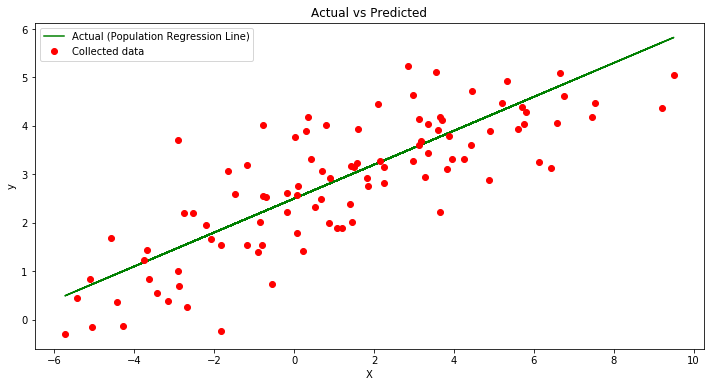

In [8]:
# Plot regression against actual data
plt.figure(figsize=(12, 6))
# Population Regression Line
plt.plot(X,rl['RegL'], label = 'Actual (Population Regression Line)',color='green')
# Least squares line
#plt.plot(X, ypred, label = 'Predicted (Least Squares Line)', color='blue')     
# scatter plot showing actual data
plt.plot(X, y, 'ro', label ='Collected data')   
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
#plt.savefig('ActualVsPredicted.png')

In [9]:
#import junix
#junix.export_images(filepath="TestCellOutput.ipynb")

In [10]:
import platform
platform.system()

'Linux'

In [11]:
platform.platform()

'Linux-4.4.0-19041-Microsoft-x86_64-with-debian-bullseye-sid'